# House Price Prediction :
#Develop a machine learning model for predicting house prices using Python,scikit-learn, and TensorFlow.

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

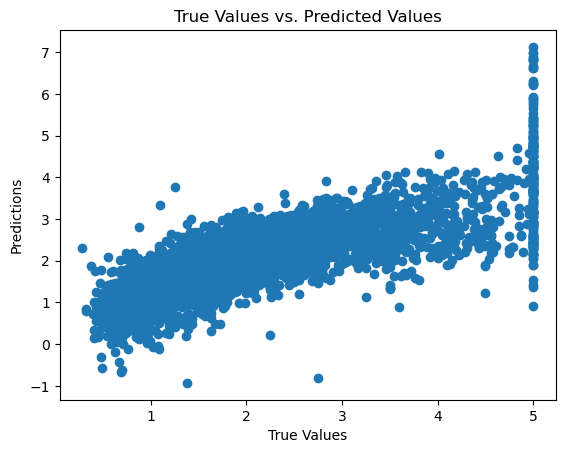

In [1]:
#Develop a machine learning model for predicting house prices using Python

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
print(california_housing.DESCR)  

df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['PRICE'] = california_housing.target

print(df.head())
print(df.info())
print(df.describe())

X = df.drop('PRICE', axis=1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on training set
train_predictions = model.predict(X_train)
mse_train = mean_squared_error(y_train, train_predictions)
r2_train = r2_score(y_train, train_predictions)

# Predictions on test set
test_predictions = model.predict(X_test)
mse_test = mean_squared_error(y_test, test_predictions)
r2_test = r2_score(y_test, test_predictions)

print('Training Set:')
print(f'Mean Squared Error: {mse_train}')
print(f'R^2 Score: {r2_train}')

print('\nTest Set:')
print(f'Mean Squared Error: {mse_test}')
print(f'R^2 Score: {r2_test}')

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predicted Values')
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Mean Squared Error: 0.5101046956164849
R^2 Score: 0.6235209700945569


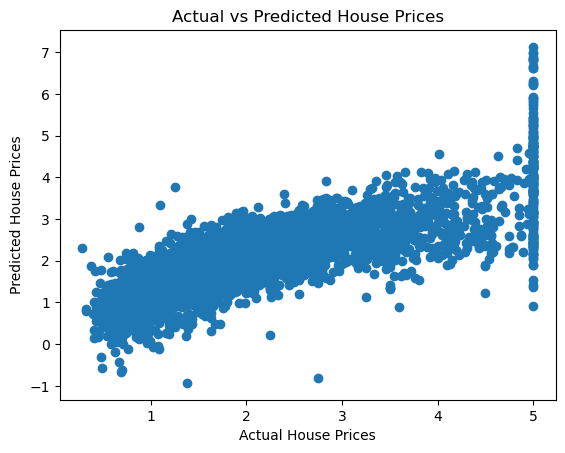

In [2]:
#Develop a machine learning model for predicting house prices using scikit-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to pandas DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Explore the data
print(data.head())

# Preprocess the data
# Split data into features and target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Epoch 1/50


C:\Users\Anusha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8932 - mae: 0.6078 - val_loss: 0.4321 - val_mae: 0.4502
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3870 - mae: 0.4404 - val_loss: 0.3938 - val_mae: 0.4301
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3818 - mae: 0.4175 - val_loss: 0.3508 - val_mae: 0.4082
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3643 - mae: 0.4202 - val_loss: 0.3549 - val_mae: 0.4145
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3378 - mae: 0.4058 - val_loss: 0.3458 - val_mae: 0.4032
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3352 - mae: 0.4031 - val_loss: 0.3480 - val_mae: 0.4192
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3241 - mae: 0.3982 - val_loss: 0.3538 - val_mae: 0.3925
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3112 - mae: 0.3865 - val_loss: 0.3326 - val_mae: 0.3971
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3052 

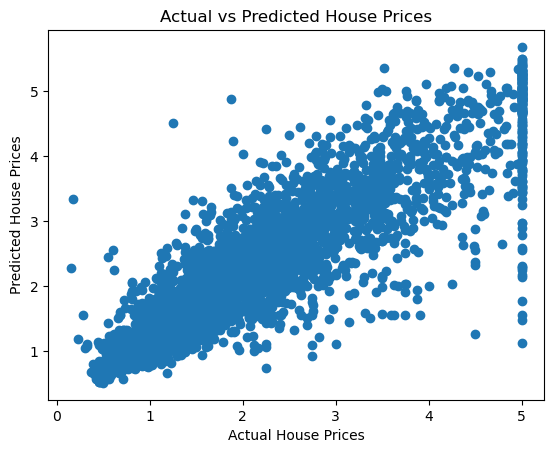

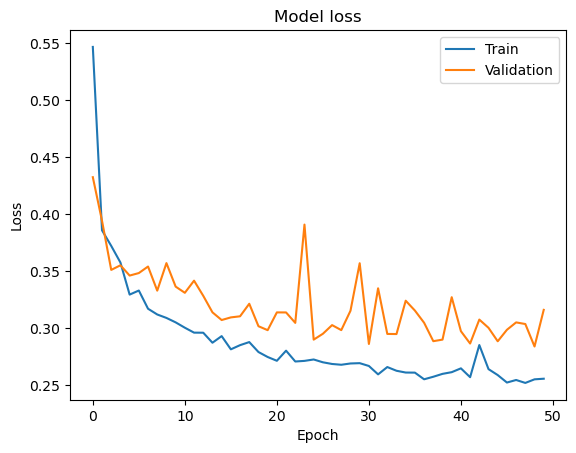

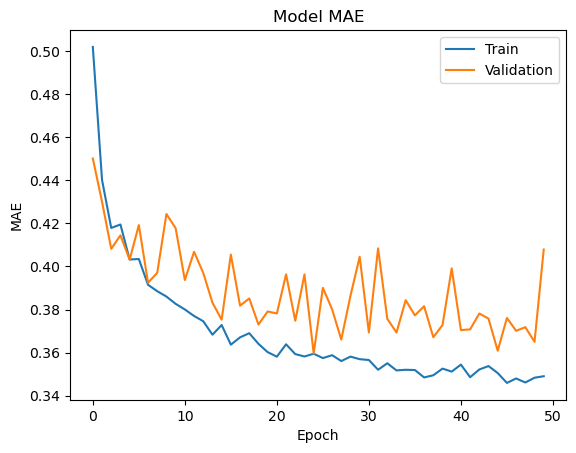

In [3]:
#Develop a machine learning model for predicting house prices using  TensorFlow

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to pandas DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Explore the data
print(data.head())

# Preprocess the data
# Split data into features and target
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a TensorFlow model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test data: {mae}')

# Make predictions
y_pred = model.predict(X_test).flatten()

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
